# Mempool analysis

In [1]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [17]:
lines = [line.rstrip('\n') for line in open('data/mempool/mempoolcache557810.csv')]
poolRates = [line.split(',') for line in lines[1:]]

byHeight = {}
for poolRate in poolRates:
    rates = list(map(float, poolRate[1:]))
    byHeight[poolRate[0]]= rates

In [25]:
stats = {'height': [],
         'numberOfRates': [],
         'averageRate': [],
         'std': [],
         'medianRate': [],}

for height, rates in byHeight.items():
    stats['height'].append(height)
    stats['numberOfRates'].append(len(rates))
    stats['averageRate'].append(np.mean(rates))
    stats['std'].append(np.std(rates))
    stats['medianRate'].append(np.median(rates))

df = pd.DataFrame.from_dict(stats)
df = df.sort_values(by=['height'])
df

,height,numberOfRates,averageRate,std,medianRate
1,557770,15508,14.118505,23.721615,10.0000
25,557771,17291,16.038477,23.595472,11.0670
14,557772,16056,12.167361,16.992102,10.0000
9,557773,15546,10.819199,13.591278,9.0580
27,557775,20530,19.809237,36.662656,12.7330
15,557776,21407,17.009722,22.476976,13.1750
2,557777,20734,14.809677,17.755172,12.0465
16,557778,17972,11.209735,9.648164,10.0000
32,557780,15017,10.249131,18.951011,7.4070
3,557781,17206,14.722528,27.212478,9.9970


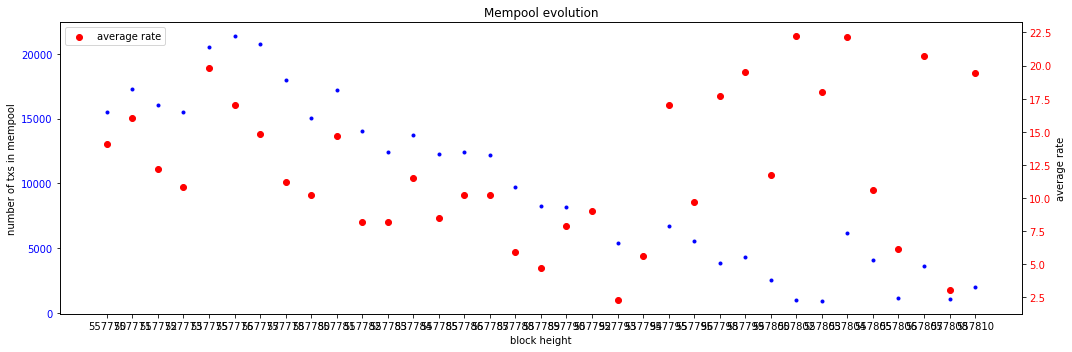

In [31]:
import matplotlib.pyplot as plt

x1 = df["height"].values
y1 = df["numberOfRates"].values
y2 = df["averageRate"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1,y1, c='b', marker='.', label='number of txs')
ax.set_xlabel('block height')
ax.set_ylabel('number of txs in mempool')
ax.tick_params(axis='y', labelcolor="b")

ax2 = ax.twinx()
ax2.set_ylabel('average rate')  # we already handled the x-label with ax1
ax2.scatter(x1, y2, c='r', label='average rate')
ax2.tick_params(axis='y', labelcolor="r")

plt.title('Mempool evolution')
plt.legend(loc=2)
fig.tight_layout()
